### <font color='#ADD8E6'><b>Exploratory Data Analysis (EDA)</b></font>

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<font color='#8BC34A'><b>Most common unique values of churned customers </b></font>

In [3]:
df_churn = df[df['Exited']==1]
for i, column in enumerate(df_churn.columns):
    if i < 3:
        continue
    key = df_churn[column].value_counts().index[0]
    value = df_churn[column].value_counts().values[0]
    print(f"{column}: {key} ----> count:{value}")

CreditScore: 850 ----> count:43
Geography: Germany ----> count:814
Gender: Female ----> count:1139
Age: 46 ----> count:91
Tenure: 1 ----> count:232
Balance: 0.0 ----> count:500
NumOfProducts: 1 ----> count:1409
HasCrCard: 1 ----> count:1424
IsActiveMember: 0 ----> count:1302
EstimatedSalary: 101348.88 ----> count:1
Exited: 1 ----> count:2037


In [4]:
# Dropping useless features
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df.rename(columns={"Exited":"Churned"},inplace=True)

<font color='#8BC34A'><b>Customer Churn Distribution</b></font>

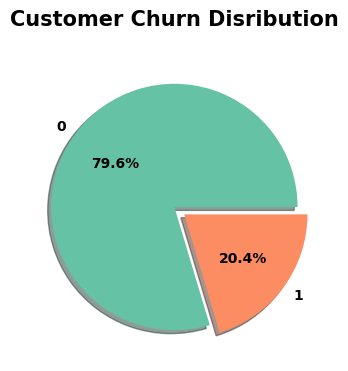

In [5]:
count = df["Churned"].value_counts()
plt.figure(figsize=(8,4))
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),shadow=True,
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churn Disribution",fontweight="black",size=15,pad=20)
plt.show()

<font color='#8BC34A'><b>Customer Churn Distribution by Gender</b></font>

Text(0.5, 1.0, 'Customer Churn Disribution')

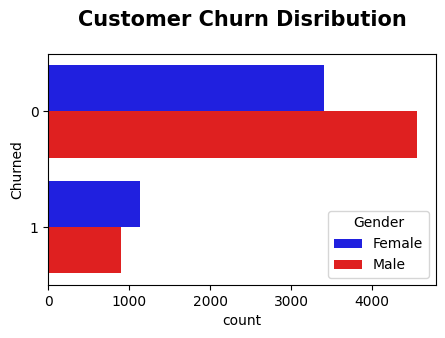

In [6]:
plt.figure(figsize=(5,3))
sns.countplot(y=df["Churned"], data=df, palette=["blue", "red"], hue=df['Gender'])
plt.title("Customer Churn Disribution", fontweight="black", size=15, pad=20)

<font color='#ADD8E6'><b>Inference:</b></font>
- Female customers are more likely to switch to a different bank than male customers.<br>

<font color='#ADD8E6'><b>Recommendation:</b></font>
- The bank can improve customer retention among females by developing targeted marketing campaigns and focusing on enhancing their overall customer experience.

<font color='#8BC34A'><b>Creating (*crosstab*) Function for various columns</b></font>

In [7]:
def crosstab(column):
    pivot = pd.crosstab(df[column], df['Churned'])

    # Create a bar chart
    plt.figure(figsize=(8,5))
    ax = pivot.plot(kind='bar', rot=0)

    for value in ax.patches:
            x = value.get_x() + value.get_width() / 2 - 0.05
            y = value.get_y() + value.get_height() + 30 
            ax.annotate(str(value.get_height()), (x,y))

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Customer Churn Distribution by {column}', fontweight="black", size=10, pad=20)
    plt.legend(title='Churn')
    plt.show()

<font color='#8BC34A'><b>Customer Churn Distribution by Gender</b></font>

<Figure size 800x500 with 0 Axes>

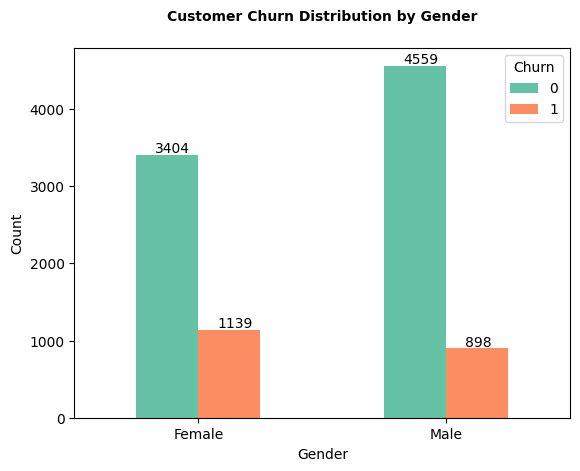

In [8]:
crosstab('Gender')

<font color='#8BC34A'><b>Customer Churn Distribution by Geography</b></font>

<Figure size 800x500 with 0 Axes>

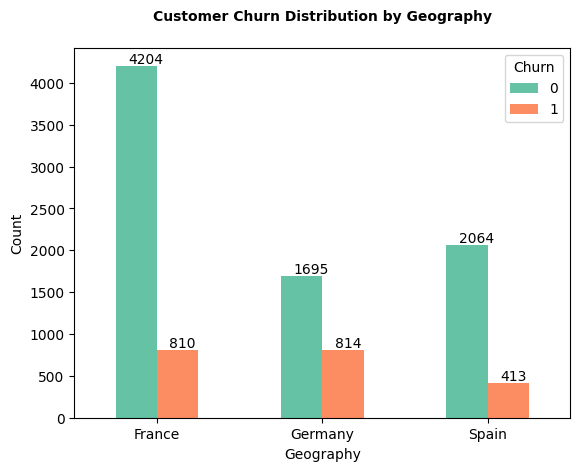

In [9]:
crosstab('Geography')

<font color='#ADD8E6'><b>Inference:</b></font>
- France has the most customers (nearly half of the data). France and Germany having identical churn rates despite differing customer bases, while Spain's churn rate is notably lower than Germany's.<br>

<font color='#ADD8E6'><b>Recommendation:</b></font>
- The bank can identify best practices in banking facilities and customer behavior in France and adapt them to better serve its customers in Germany.

<font color='#8BC34A'><b>Customer Churn Distribution by HasCrCard</b></font>

<Figure size 800x500 with 0 Axes>

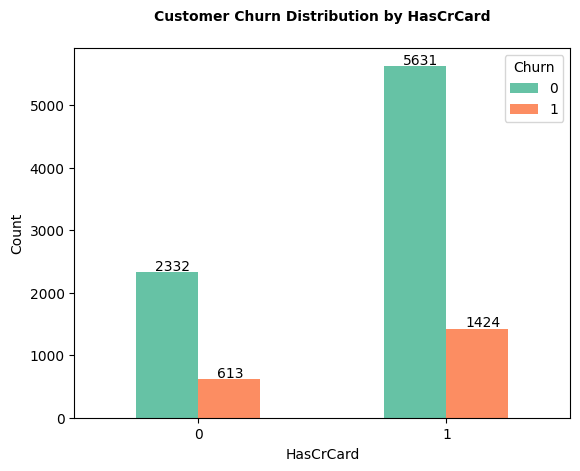

In [10]:
crosstab('HasCrCard')

<font color='#ADD8E6'><b>Inference:</b></font>
- Holding a credit card does not significantly influence a customer's likelihood of churning.

<font color='#8BC34A'><b>Customer Churn Distribution by NumOfProducts</b></font>

<Figure size 800x500 with 0 Axes>

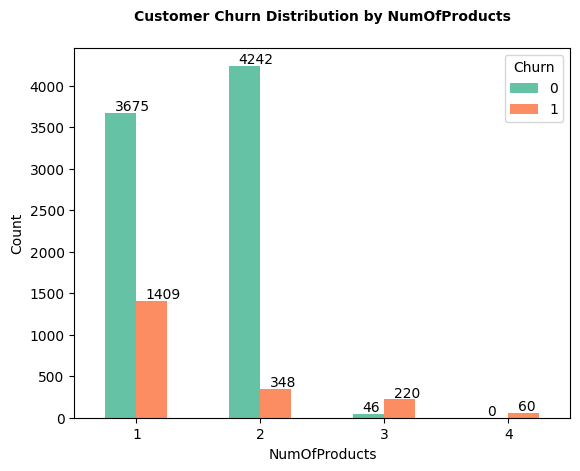

In [11]:
crosstab('NumOfProducts')

<font color='#ADD8E6'><b>Inference:</b></font>
- The majority of customers have a limited banking products, typically consisting of one or two products.
- A minority of customers have three or more banking products.<br>

<font color='#ADD8E6'><b>Recommendation:</b></font>
- Customers with only one product are more prone to churning, so providing attractive incentives can encourage them to add more products and strengthen their banking relationship.

<font color='#8BC34A'><b>Customer Churn Distribution by IsActiveMember</b></font>

<Figure size 800x500 with 0 Axes>

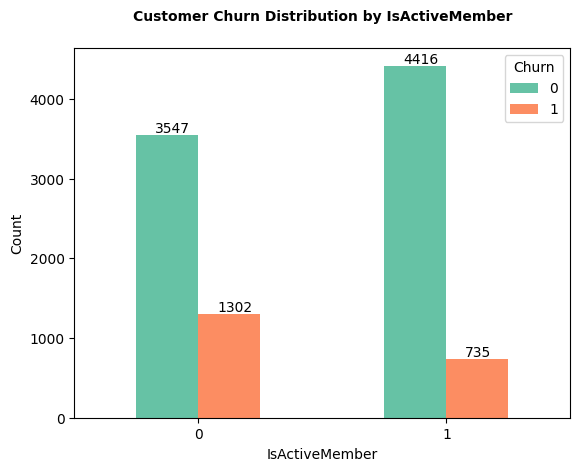

In [12]:
crosstab('IsActiveMember')

<font color='#ADD8E6'><b>Inference:</b></font>
- Non-active customers are nearly twice as likely to churn as active customers, indicating a higher risk of account deactivation.<br>

<font color='#ADD8E6'><b>Recommendation:</b></font>
- Regular engagement through communication and updates can help the bank retain active customers.

<font color='#8BC34A'><b>Customer Churn Distribution by Tenure</b></font>

<Figure size 800x500 with 0 Axes>

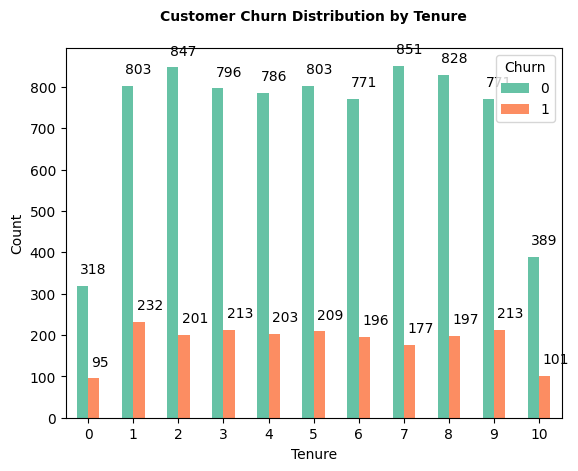

In [13]:
crosstab('Tenure')

In [14]:
def continuous_hist_plot(columns):
    plt.figure(figsize=(13,8))
    
    plt.title(f"Distribution of {', '.join(columns)} by Churn", fontweight="black", pad=15, size=12)
    for i, column in enumerate(columns):
        ax = plt.subplot(2,2,i+1)
        sns.histplot(x=column, hue="Churned", data=df, kde=True, palette="Set2", ax=ax, stat="count")
        ax.set_title(column)
    
    plt.tight_layout()
    plt.show()
        

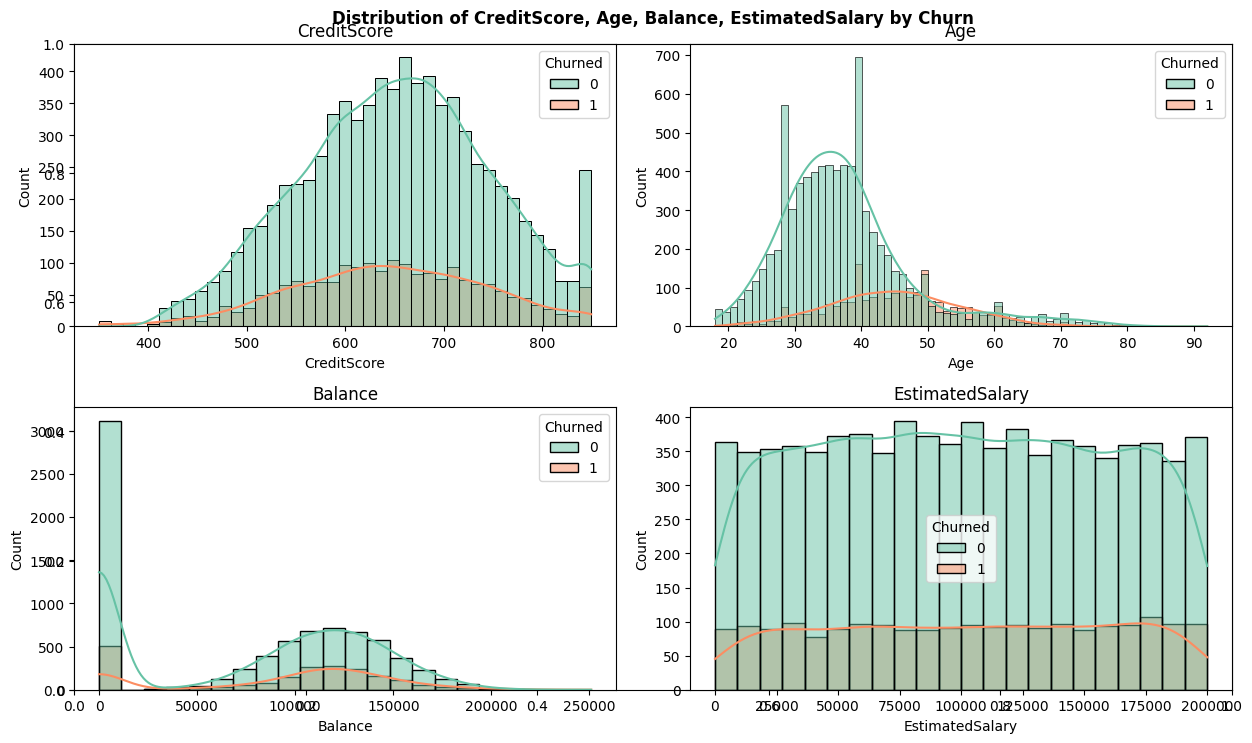

In [15]:
continuous_hist_plot(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'])

<font color='#ADD8E6'><b>Inference:</b></font>
- The median credit scores of both churned and retained customers are roughly equivalent.
- The median EstimatedSalary of both churned and retained customers are roughly equivalent.
- The age distribution has right skewness, due to outliers, so posing a risk of overfitting. 
- The number of customers with a zero account balance exceeds 3000.
<br>

<font color='#ADD8E6'><b>Recommendation:</b></font>
- To mitigate the impact of outliers in age column, we can utilize a log-normal transformation to transform the data into a more normal distribution.
- Feature Engineering can be done by categorizing customers into two separate groups: zero balance holders and those with a balance greater than zero.

In [16]:
def continuous_box_plot(columns):
    plt.figure(figsize=(13,10))
    
    plt.title(f"Distribution of {', '.join(columns)} by Churn", fontweight="black", pad=15, size=12)
    for i, column in enumerate(columns):
        ax = plt.subplot(2,2,i+1)
        sns.boxplot(x=df['Churned'], y=df[column], data=df, palette="Set2")
        ax.set_title(column)
    
    plt.tight_layout()
    plt.show()

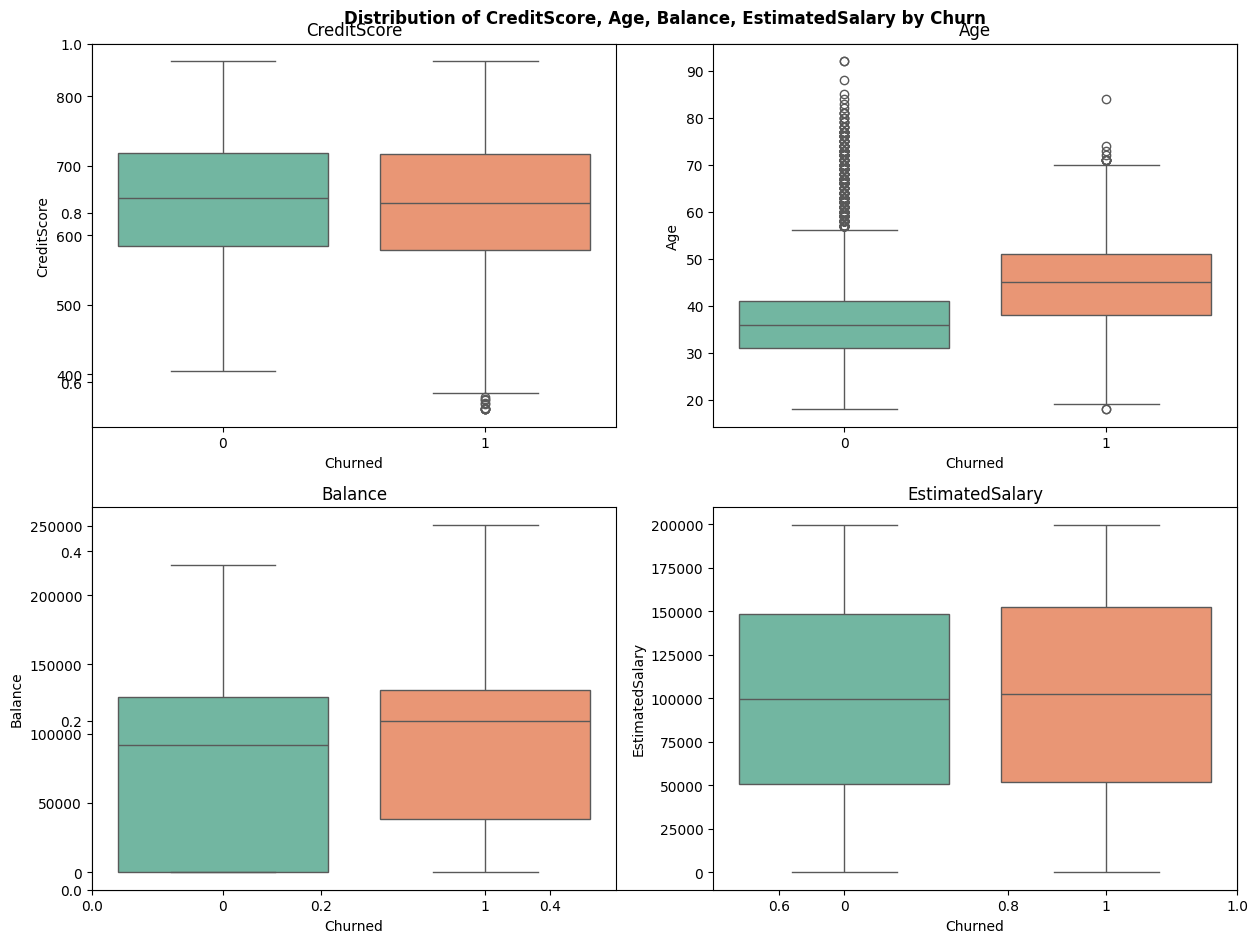

In [17]:
continuous_box_plot(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'])